In [215]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [216]:
# Loading Dataset
dataset = pd.read_csv('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/Concrete_Data.csv')

In [217]:
dataset.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [218]:
dataset.shape

(1030, 9)

In [219]:
dataset.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water ',
       'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ',
       'Concrete compressive strength'],
      dtype='object')

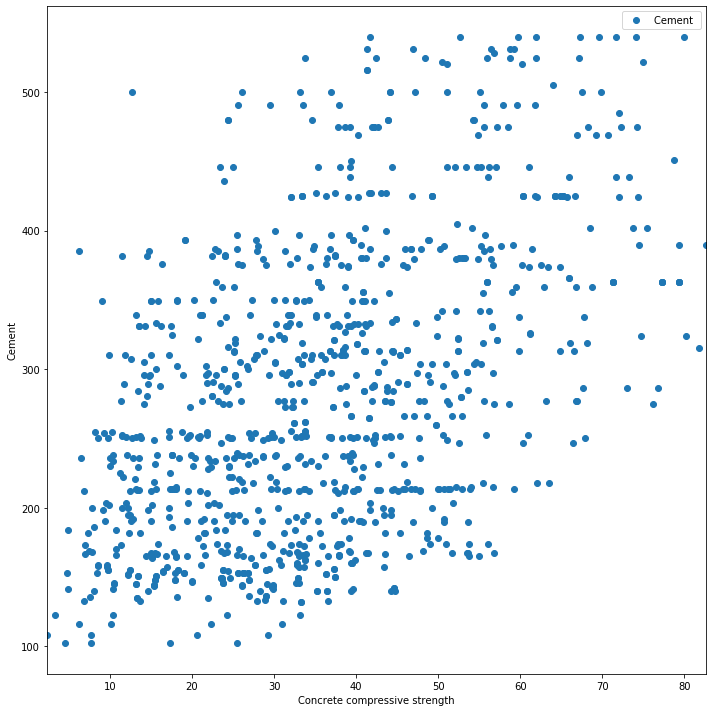

In [220]:
dataset.plot(x='Concrete compressive strength', y='Cement ', style='o', figsize=(10,10))   
plt.xlabel('Concrete compressive strength')  
plt.ylabel('Cement')
plt.tight_layout()
plt.show()

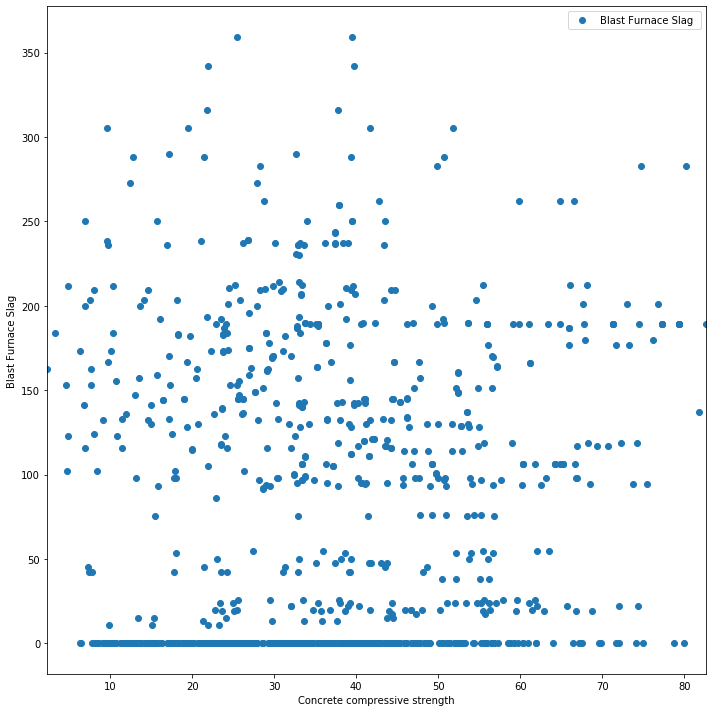

In [221]:
dataset.plot(x='Concrete compressive strength', y='Blast Furnace Slag ', style='o', figsize=(10,10))   
plt.xlabel('Concrete compressive strength')  
plt.ylabel('Blast Furnace Slag')
plt.tight_layout()
plt.show()

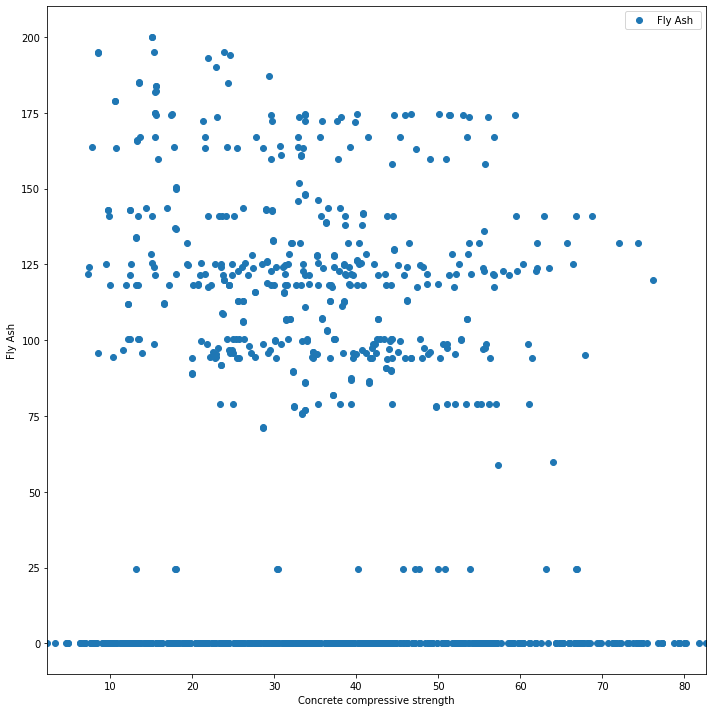

In [222]:
dataset.plot(x='Concrete compressive strength', y='Fly Ash ', style='o', figsize=(10,10))   
plt.xlabel('Concrete compressive strength')  
plt.ylabel('Fly Ash')
plt.tight_layout()
plt.show()

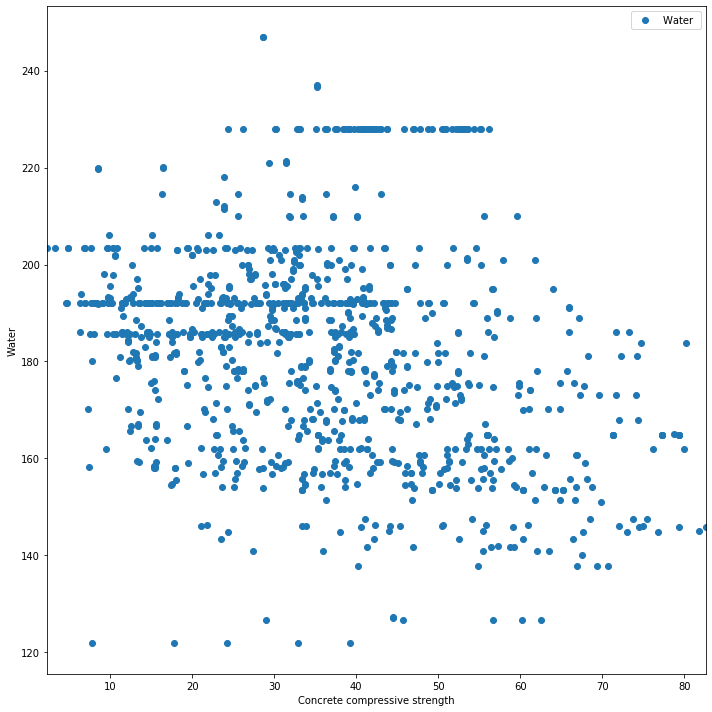

In [223]:
dataset.plot(x='Concrete compressive strength', y='Water ', style='o', figsize=(10,10))   
plt.xlabel('Concrete compressive strength')  
plt.ylabel('Water')
plt.tight_layout()
plt.show()

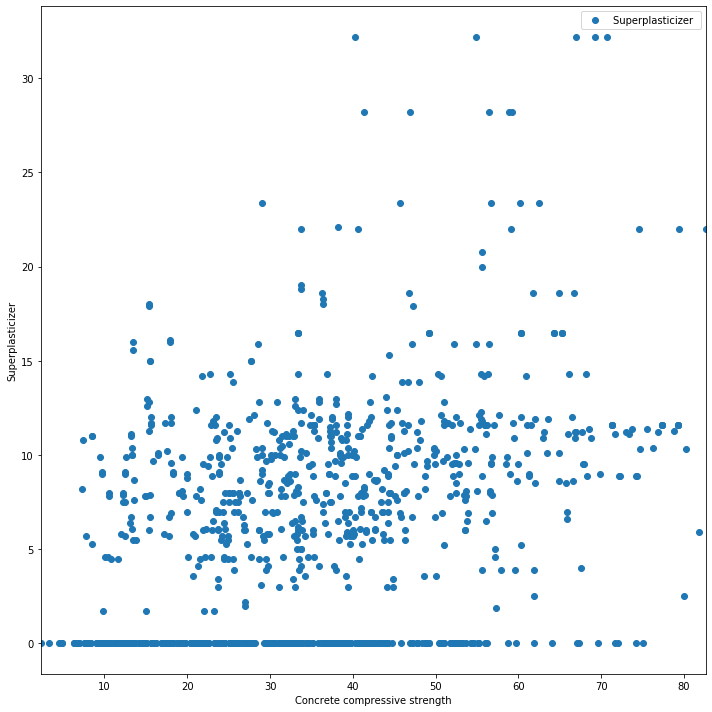

In [224]:
dataset.plot(x='Concrete compressive strength', y='Superplasticizer ', style='o', figsize=(10,10))   
plt.xlabel('Concrete compressive strength')  
plt.ylabel('Superplasticizer')
plt.tight_layout()
plt.show()

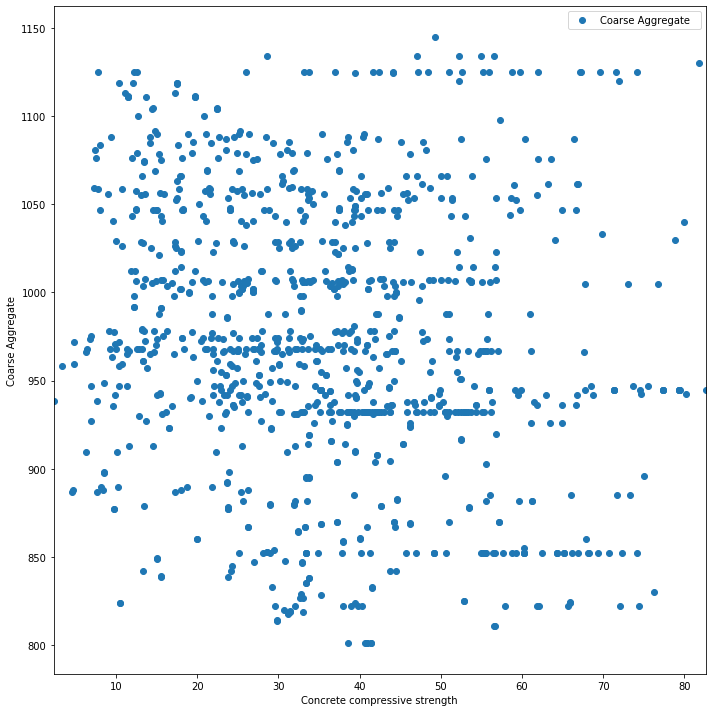

In [225]:
dataset.plot(x='Concrete compressive strength', y='Coarse Aggregate  ', style='o', figsize=(10,10))   
plt.xlabel('Concrete compressive strength')  
plt.ylabel('Coarse Aggregate')
plt.tight_layout()
plt.show()

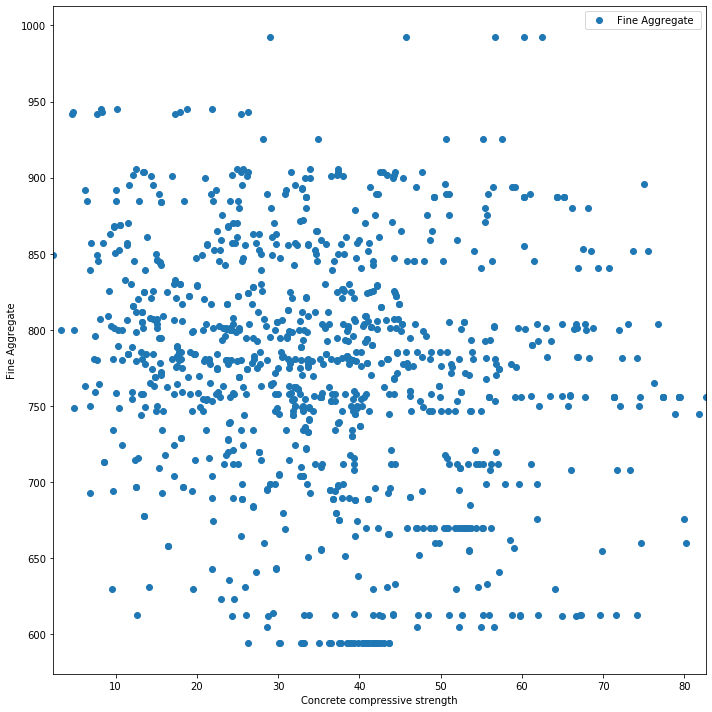

In [226]:
dataset.plot(x='Concrete compressive strength', y='Fine Aggregate ', style='o', figsize=(10,10))   
plt.xlabel('Concrete compressive strength')  
plt.ylabel('Fine Aggregate')
plt.tight_layout()
plt.show()

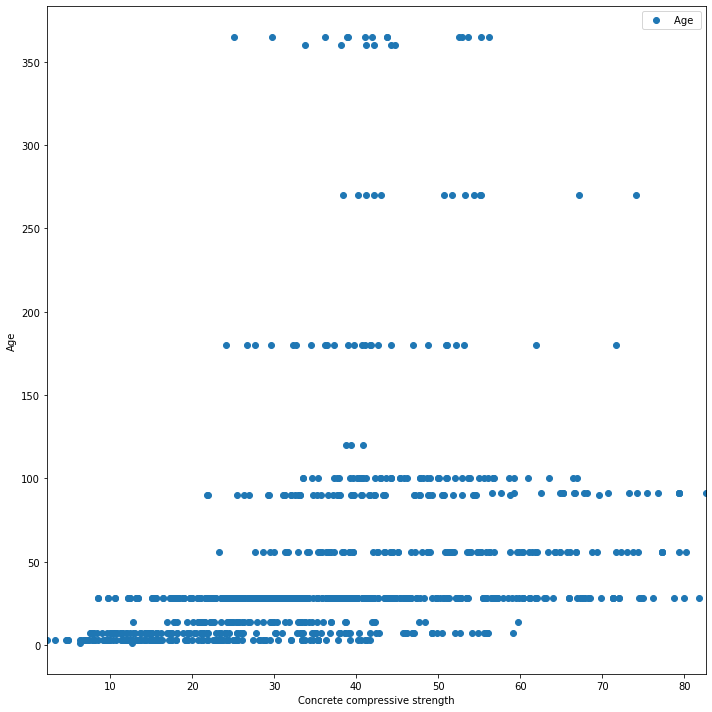

In [227]:
dataset.plot(x='Concrete compressive strength', y='Age ', style='o', figsize=(10,10))   
plt.xlabel('Concrete compressive strength')  
plt.ylabel('Age')
plt.tight_layout()
plt.show()

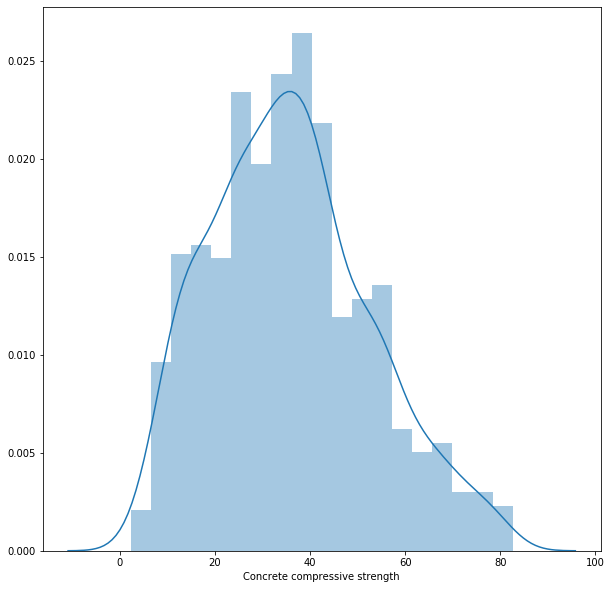

In [228]:
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(dataset['Concrete compressive strength'])

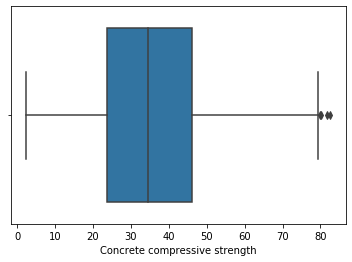

In [229]:
sns.boxplot(x=dataset['Concrete compressive strength'])

In [230]:
lower_bound = 0.1
upper_bound = 0.95
lower_upper_bound = dataset['Concrete compressive strength'].quantile([lower_bound,upper_bound])
lower_upper_bound

0.10    14.200
0.95    66.802
Name: Concrete compressive strength, dtype: float64

In [231]:
new_index = (lower_upper_bound[lower_bound] < dataset['Concrete compressive strength'].values) &\
(dataset['Concrete compressive strength'].values < lower_upper_bound[upper_bound]) 

In [232]:
new_index

array([False,  True,  True, ...,  True,  True,  True])

In [233]:
dataset = dataset[new_index]

In [234]:
dataset['Concrete compressive strength']

1       61.89
2       40.27
3       41.05
4       44.30
5       47.03
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength, Length: 874, dtype: float64

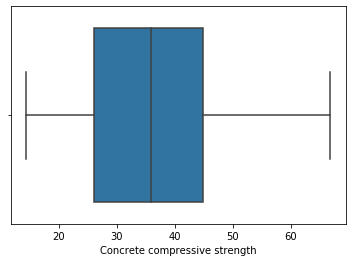

In [235]:
sns.boxplot(x=dataset['Concrete compressive strength'])

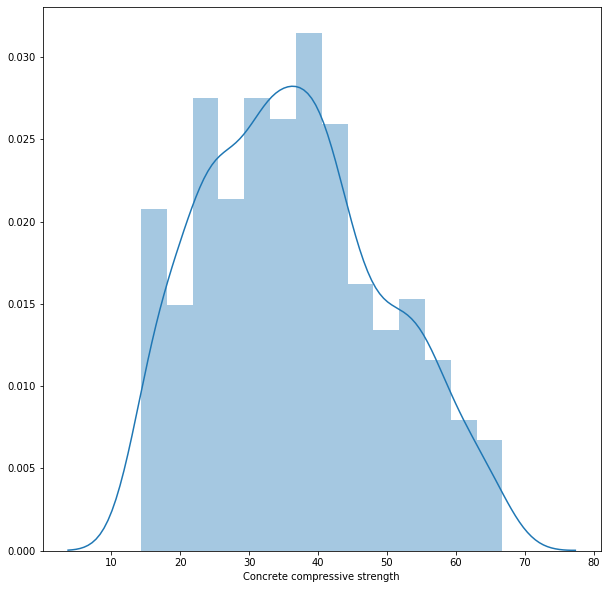

In [236]:
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(dataset['Concrete compressive strength'])

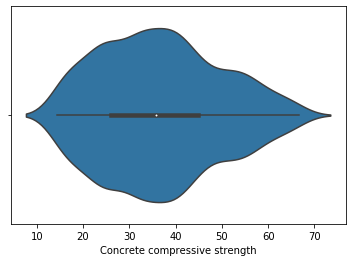

In [237]:
sns.violinplot(x=dataset["Concrete compressive strength"])

In [238]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [239]:
MinMax = MinMaxScaler()
dataset_norm = MinMax.fit_transform(dataset)

In [249]:
print(dataset_norm)

[[1.         0.         0.         ... 0.20572002 0.06906077 0.90680389]
 [0.52625571 0.39649416 0.         ... 0.         0.73756906 0.49475891]
 [0.52625571 0.39649416 0.         ... 0.         1.         0.50962455]
 ...
 [0.10616438 0.38786867 0.54272864 ... 0.46663322 0.06906077 0.17895941]
 [0.1303653  0.51947691 0.         ... 0.48896136 0.06906077 0.35182009]
 [0.36278539 0.27963272 0.39130435 ... 0.42022077 0.06906077 0.34476844]]


In [243]:
dataset_norm.shape

(874, 9)

In [244]:
Standard = StandardScaler()
dataset_stand = Standard.fit_transform(dataset)

In [250]:
print(dataset_stand)

[[ 2.52584795 -0.84650029 -0.89471987 ... -1.17048206 -0.31847573
   1.96023929]
 [ 0.48786695  0.82687314 -0.89471987 ... -2.18419309  3.35798781
   0.28439739]
 [ 0.48786695  0.82687314 -0.89471987 ... -2.18419309  4.80122763
   0.34485792]
 ...
 [-1.31930656  0.79046993  0.8052615  ...  0.11520022 -0.31847573
  -1.00000132]
 [-1.21519765  1.34591248 -0.89471987 ...  0.22522496 -0.31847573
  -0.29695387]
 [-0.21535926  0.33366834  0.3309573  ... -0.11350288 -0.31847573
  -0.32563386]]


In [247]:
dataset_stand.shape

(874, 9)

In [251]:
features_norm = dataset_norm[:,:-1]
target_norm = dataset_norm[:,-1]
features_stand = dataset_stand[:,:-1]
target_stand = dataset_stand[:,-1]

In [252]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(features_norm,target_norm,test_size=0.25,random_state=2)

In [253]:
X_train_stand, X_test_stand, Y_train_stand, Y_test_stand = train_test_split(features_stand,target_stand,test_size=0.25,random_state=2)

In [254]:
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/X_train_norm',X_train_norm)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/X_test_norm',X_test_norm)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/Y_train_norm',Y_train_norm)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/Y_test_norm',Y_test_norm)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/X_train_stand',X_train_stand)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/X_test_stand',X_test_stand)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/Y_train_stand',Y_train_stand)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/Y_test_stand',Y_test_stand)

In [255]:
dataset = dataset.values
features = dataset[:,:-1]
target = dataset[:,-1]

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size=0.25,random_state=2)

In [257]:
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/X_train',X_train)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/X_test',X_test)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/Y_train',Y_train)
np.save('/home/jaco/Documentos/Projetos/Data Minning Project/Regression/Y_test',Y_test)